# Square Enix Website Data Analysis

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

#Ignore all warnings 

import warnings
warnings.filterwarnings("ignore")

### Improrting Data 

In [23]:
website_df = pd.read_excel("Case Study_Website Data (2).xlsx")

### Basic Information About the Data

In [24]:
website_df.head(5)

,date,UserID,Campaign Name,source,platform,device,pagesVisited,timeOnSite
0,2025-01-14 17:50:34,52677213,Summon Savings,Email,Email,desktop,6,598
1,2025-01-04 06:44:25,17650652,Moogle Merch Mania,Paid Search,Google,mobile,3,272
2,2025-01-17 02:28:26,96964816,Summon Savings,Paid Search,Google,mobile,3,107
3,2025-01-13 03:27:57,51304201,Summon Savings,Email,Email,desktop,1,319
4,2025-01-19 21:15:24,72438156,Aeris Weekend Deals,Social,IG,mobile,6,485


In [25]:
website_df.head()

,date,UserID,Campaign Name,source,platform,device,pagesVisited,timeOnSite
0,2025-01-14 17:50:34,52677213,Summon Savings,Email,Email,desktop,6,598
1,2025-01-04 06:44:25,17650652,Moogle Merch Mania,Paid Search,Google,mobile,3,272
2,2025-01-17 02:28:26,96964816,Summon Savings,Paid Search,Google,mobile,3,107
3,2025-01-13 03:27:57,51304201,Summon Savings,Email,Email,desktop,1,319
4,2025-01-19 21:15:24,72438156,Aeris Weekend Deals,Social,IG,mobile,6,485


### Summary Statistics 

In [26]:
summary_statistics = website_df.describe()
summary_statistics

,date,UserID,pagesVisited,timeOnSite
count,2000,2.000000e+03,2000.000000,2000.000000
mean,2025-01-14 13:50:20.387499776,5.021597e+07,7.454500,371.554500
min,2025-01-01 00:08:39,1.191500e+04,0.000000,0.000000
25%,2025-01-07 10:06:32.750000128,2.502535e+07,3.000000,162.750000
50%,2025-01-14 06:57:05.500000,5.031350e+07,7.000000,368.000000
75%,2025-01-21 19:18:06.500000,7.489998e+07,11.000000,574.000000
max,2025-01-28 17:48:55,9.998560e+07,15.000000,870.000000
std,NaN,2.909333e+07,4.589604,239.290752


### Duplicate Entries

In [27]:
duplicated_entries = website_df.duplicated().sum()
duplicated_entries


0

### Missing Values

In [28]:
missing_values = website_df.isnull().sum()
missing_values

date             0
UserID           0
Campaign Name    0
source           0
platform         0
device           0
pagesVisited     0
timeOnSite       0
dtype: int64

### Plot distribution of pages visited


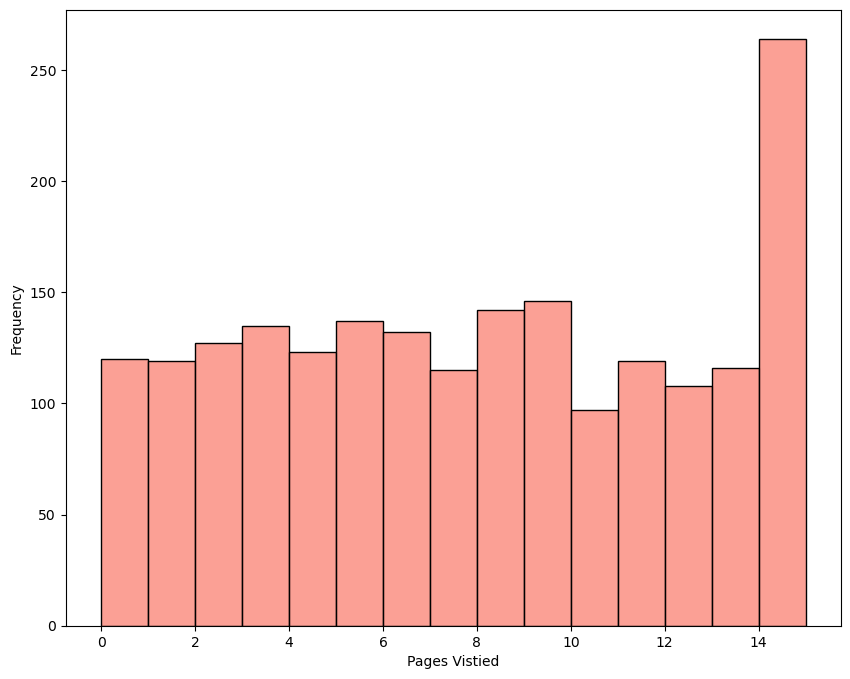

In [29]:
plt.figure(figsize=(10,8))
sns.histplot(website_df["pagesVisited"], bins=15, color="salmon")
plt.xlabel("Pages Vistied")
plt.ylabel("Frequency")
plt.show()

### Time on Site Distribution

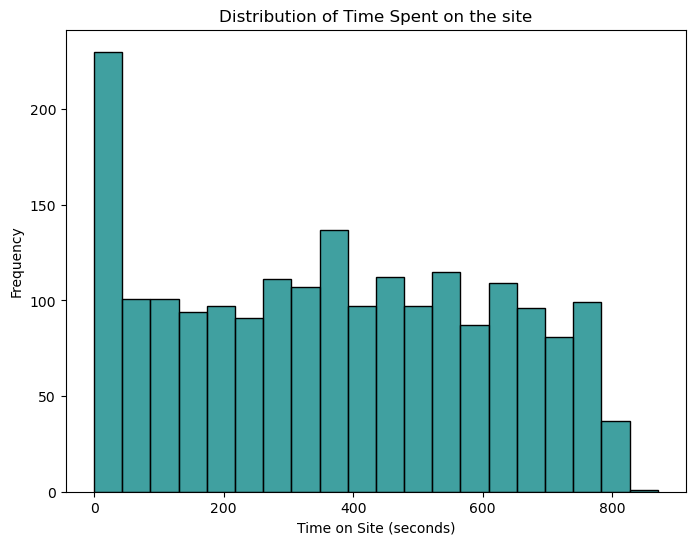

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(website_df["timeOnSite"], bins=20, color="Teal")
plt.xlabel("Time on Site (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Time Spent on the site")
plt.show()

Pages Visited Distribution:
    
1. Most users visit between 3 to 11 pages.
2. A small number of users visit either very few (close to 0) or the maximum of 15 pages.

Time on Site Distribution:

1. Majority of users spend under 600 seconds (10 minutes).
2. There are some users with extremely short sessions (close to 0 seconds).
3. The distribution shows a peak between 200 to 400 seconds (~3-6 minutes).


### Distribution of Traffic Sources

In [32]:
traffic_source_analysis = website_df['source'].value_counts()
traffic_source_analysis

source
Paid Search    683
Email          670
Social         647
Name: count, dtype: int64

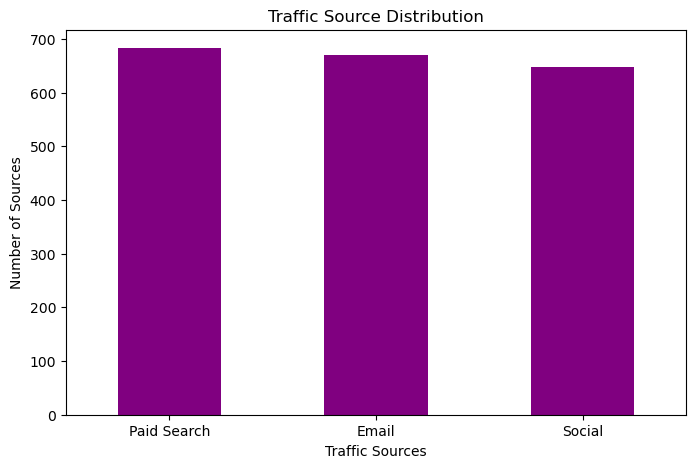

In [39]:
plt.figure(figsize=(8,5))
traffic_source_analysis.plot(kind="bar", color="purple")
plt.xlabel("Traffic Sources")
plt.ylabel("Number of Sources")
plt.title("Traffic Source Distribution")
plt.xticks(rotation=0)
plt.show()
                

In [ ]:
plt.figure(figsize=(8, 5))
traffic_source_analysis.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Traffic Source")
plt.ylabel("Number of Users")
plt.title("Traffic Source Distribution")
plt.xticks(rotation=45)
plt.show()


### Analyze the impact of device type on engagement

In [45]:
device_engagement = website_df.groupby("device").agg(
    avg_pages_visited=("pagesVisited", "mean"),
    avg_time_on_site=("timeOnSite", "mean"),
    user_count=("UserID", "count")
).sort_values(by="avg_time_on_site", ascending=False)

device_engagement


,avg_pages_visited,avg_time_on_site,user_count
device,,,
mobile,7.671968,378.642147,1006
desktop,7.234406,364.381288,994


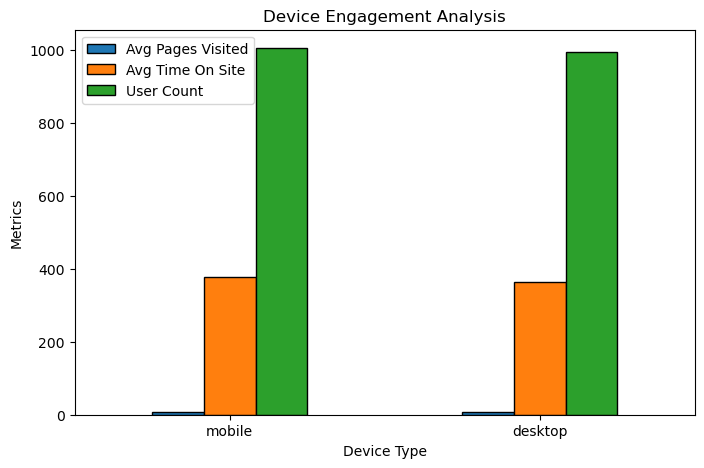

In [47]:
device_engagement.plot(kind="bar", figsize=(8,5), edgecolor="black")
plt.xlabel("Device Type")
plt.ylabel("Metrics")
plt.title("Device Engagement Analysis")
plt.xticks(rotation=0)
plt.legend(["Avg Pages Visited", "Avg Time On Site", "User Count"])
plt.show()

### Analyze platform performance

In [52]:
platform_performance = website_df.groupby("platform").agg(
    avg_pages_visited=("pagesVisited", "mean"),
    avg_time_on_site=("timeOnSite", "mean"),
    user_count=("UserID", "count")
).sort_values(by="avg_time_on_site", ascending=False)


platform_performance

,avg_pages_visited,avg_time_on_site,user_count
platform,,,
Bing,7.599369,383.012618,317
FB,7.329341,377.311377,334
IG,7.741214,374.610224,313
Google,7.404372,366.467213,366
Email,7.341791,364.614925,670


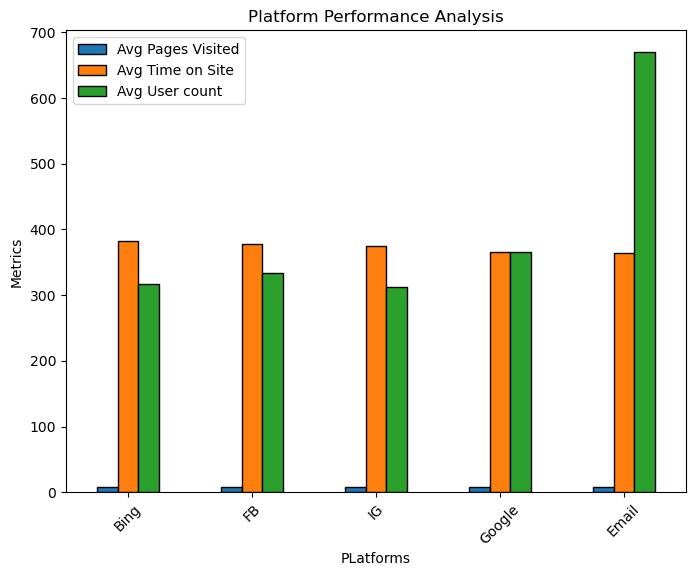

In [53]:
platform_performance.plot(kind="bar", figsize=(8,6), edgecolor="black")
plt.xlabel("PLatforms")
plt.ylabel("Metrics")
plt.title("Platform Performance Analysis")
plt.xticks(rotation=45)
plt.legend(["Avg Pages Visited", "Avg Time on Site", "Avg User count"])
plt.show()

### Time-Based Analysis 

In [55]:
# Extract date and hour for time-based analysis

website_df["date_only"] = website_df["date"].dt.date
website_df["hour"] = website_df["date"].dt.hour

In [57]:
#Analyzing Daily Trends

daily_trends = website_df.groupby("date_only").agg(
    avg_pages_visited=("pagesVisited", "mean"), 
    avg_time_on_site=("timeOnSite", "mean"), 
    user_count=("UserID", "count")
)

daily_trends.head(4)

,avg_pages_visited,avg_time_on_site,user_count
date_only,,,
2025-01-01,6.470588,366.544118,68
2025-01-02,7.974359,378.000000,78
2025-01-03,7.500000,342.329268,82
2025-01-04,7.678571,376.880952,84


In [59]:
## Analyze hourly trends

hourly_trends = website_df.groupby("hour").agg(
    avg_pages_visited=("pagesVisited", "mean"), 
    avg_time_on_site=("timeOnSite", "mean"), 
    user_count=("UserID", "count")
)

In [62]:
# Analyze hourly trends
hourly_trends = website_df.groupby("hour").agg(
    avg_pages_visited=("pagesVisited", "mean"),
    avg_time_on_site=("timeOnSite", "mean"),
    user_count=("UserID", "count")
)
    
hourly_trends.head(2)

,avg_pages_visited,avg_time_on_site,user_count
hour,,,
0,6.848837,354.802326,86
1,7.634921,358.555556,63


### Visualize daily trends

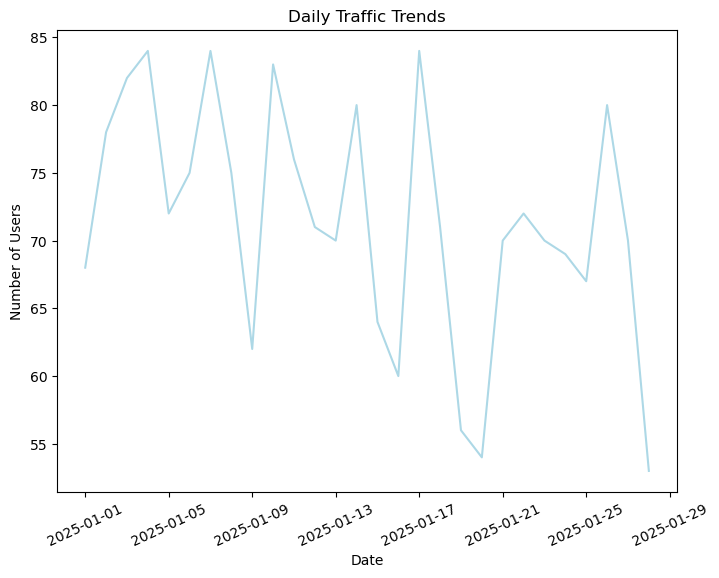

In [63]:
plt.figure(figsize=(8,6))
daily_trends["user_count"].plot(kind="line", color="lightblue")
plt.xlabel("Date")
plt.ylabel("Number of Users")
plt.title("Daily Traffic Trends")
plt.xticks(rotation=25)
plt.show()

### Visualize hourly trends

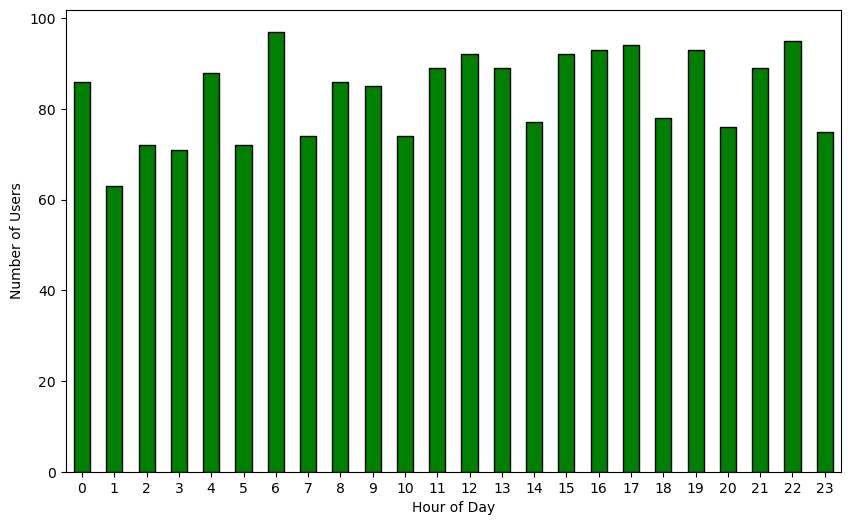

In [65]:
# Visualize hourly trends
plt.figure(figsize=(10,6))
hourly_trends["user_count"].plot(kind="bar", color="green", edgecolor="black")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()

### Bounce Rate By Source


In [66]:
# Bounce Rate Analysis - Users who visited only 1 page

website_df["bounced"] = website_df["pagesVisited"] == 1
bounce_rate_segmentation = website_df.groupby("source")["bounced"].mean().sort_values(ascending=False)

bounce_rate_segmentation



source
Paid Search    0.068814
Email          0.064179
Social         0.044822
Name: bounced, dtype: float64

### Visualization Bounce Rate By Souce

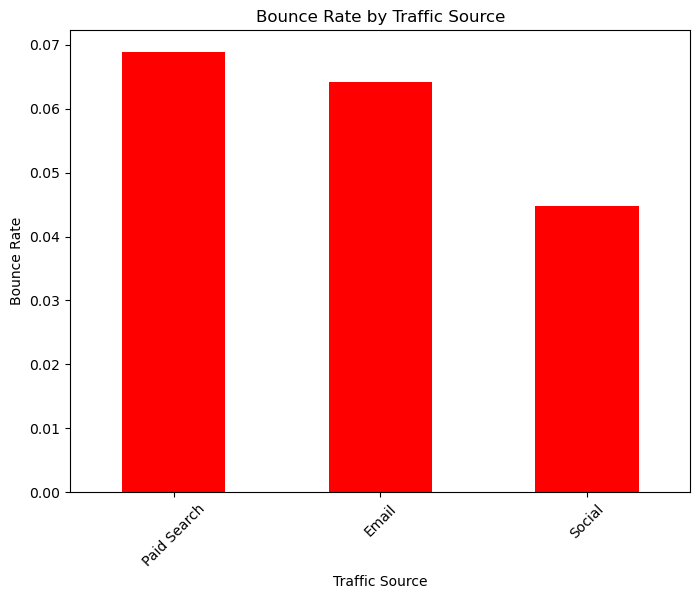

In [68]:
plt.figure(figsize=(8,6))
bounce_rate_segmentation.plot(kind="bar", color="red")
plt.xlabel("Traffic Source")
plt.ylabel("Bounce Rate")
plt.title("Bounce Rate by Traffic Source")
plt.xticks(rotation=45)
plt.show()